**<h1><center>Deep Learning Systems (ENGR-E 533) 
<br>Homework 4 , Fall 2021</h1>**

**Name: Anitha Ganapathy** <br>
**Email: aganapa@iu.edu** <br>


___

**Organize Import statements**

In [ ]:
#import some basic libraries
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential

from tensorflow.keras.callbacks import Callback 
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Dropout, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras import backend as K
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.backend import count_params
%matplotlib inline

import pandas as pd
import glob
import librosa
import pickle
from itertools import combinations

from google.colab import drive

drive.mount('/content/drive' ,force_remount =  True) 

Mounted at /content/drive


## Problem 1: Network Compression Using SVD


### Baseline Model -MNIST
Train a fully-connected net for MNIST classification.

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")


print(np.max(x_train),"\t", np.min(x_train))
print(np.max(x_test), "\t",np.min(x_test))


# Scaling the input in the range of [0,1]
x_train /= 255
x_test /= 255


print(np.max(x_train), "\t",np.min(x_train))
print(np.max(x_test), "\t",np.min(x_test))

255.0 	 0.0
255.0 	 0.0
1.0 	 0.0
1.0 	 0.0


In [ ]:
print(np.max(x_train), np.min(x_train))
print(np.max(x_test), np.min(x_test))

1.0 0.0
1.0 0.0


In [ ]:
y_train[:10] , y_test[:10]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [ ]:
# input features 28*28
num_features = 784 

# input features classess
num_classes = 10


**Baseline Model**

kernel_initializer = 'he_normal' <br>
Optimizer = Adam  <br>
Learning Rate = 0.001 <br>
Loss = Sparse Categorical Crossentropy <br>
Activation Function = Relu <br>

In [ ]:
# Baseline - fully-connected net for MNIST classification.


initializer = tf.keras.initializers.HeNormal()

baseline_FC = Sequential([
  Dense(units=1024, activation='relu', kernel_initializer = initializer,
        bias_initializer =initializer,  input_shape=(28 * 28,),name='hl1'),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,
        bias_initializer =initializer, name='hl2'),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,
        bias_initializer =initializer, name='hl3'),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,
        bias_initializer =initializer, name='hl4'),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,
        bias_initializer =initializer, name='hl5'),
  Dense(units=10, activation='softmax', name ='baseline_FC_output')                                
])

baseline_FC.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hl1 (Dense)                 (None, 1024)              803840    
                                                                 
 hl2 (Dense)                 (None, 1024)              1049600   
                                                                 
 hl3 (Dense)                 (None, 1024)              1049600   
                                                                 
 hl4 (Dense)                 (None, 1024)              1049600   
                                                                 
 hl5 (Dense)                 (None, 1024)              1049600   
                                                                 
 baseline_FC_output (Dense)  (None, 10)                10250     
                                                                 
Total params: 5,012,490
Trainable params: 5,012,490
Non-

In [ ]:
# Compile the model

# Learning rate
learning_rate = .001 

optimizer_FC = tf.keras.optimizers.Adam(learning_rate = learning_rate)

baseline_FC.compile(optimizer=optimizer_FC, loss=SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
# custom callback function to implement early stopping 
# when val_accuracy is >= 0.981

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.981:
            self.model.stop_training = True

In [ ]:
# %%time
# Train the model

# Batch size                 
batch_size = 1024

epochs = 20

callback = CustomCallback()

baseline_FC_history = baseline_FC.fit(x=x_train, y=y_train ,
                      batch_size = batch_size,
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      callbacks=[callback],
                      verbose=2)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 - 2s - loss: 0.4229 - accuracy: 0.8758 - val_loss: 0.1119 - val_accuracy: 0.9646 - 2s/epoch - 26ms/step
Epoch 2/20
59/59 - 1s - loss: 0.0827 - accuracy: 0.9743 - val_loss: 0.0792 - val_accuracy: 0.9750 - 525ms/epoch - 9ms/step
Epoch 3/20
59/59 - 1s - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0710 - val_accuracy: 0.9786 - 529ms/epoch - 9ms/step
Epoch 4/20
59/59 - 1s - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0763 - val_accuracy: 0.9760 - 527ms/epoch - 9ms/step
Epoch 5/20
59/59 - 1s - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0751 - val_accuracy: 0.9786 - 528ms/epoch - 9ms/step
Epoch 6/20
59/59 - 1s - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0816 - val_accuracy: 0.9781 - 532ms/epoch - 9ms/step
Epoch 7/20
59/59 - 1s - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0857 - val_accuracy: 0.9783 - 525ms/epoch - 9ms/step
Epoch 8/20
59/59 - 1s - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0771 - val_accuracy: 0.9797 - 526ms/epoch - 9ms/step
Epoch 9/20
59/59 - 1s - loss:

In [ ]:
test_acuuracy = baseline_FC.evaluate(x_test, y_test, verbose=0)

print('Test data Loss :     ', test_acuuracy[0])
print('Test data accuracy : ', test_acuuracy[1])

Test data Loss :      0.07384448498487473
Test data accuracy :  0.9811999797821045


**Utility function to plot the loss and accuracy of our model history.**

In [ ]:
from matplotlib.ticker import MaxNLocator

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    x = range(0,len(model_history.history['val_accuracy']))
    new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

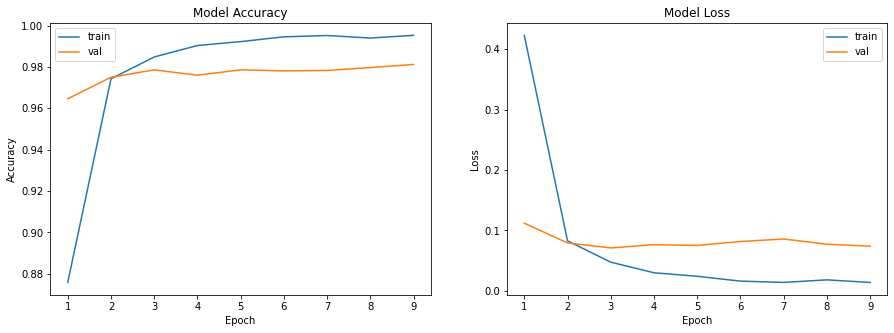

In [ ]:
plot_model_history(baseline_FC_history)

**Starting with Network Compression**

Weights from all the layers of the baseline model except for the last layer

In [ ]:
layer_weights = []

# get_weights()[0] --> weights
# get_weights()[1] --> biases

for layer in baseline_FC.layers[:-1]:
  layer_weights.append(layer.get_weights()[0])   

### Utility Function to perform  SVD

https://www.tensorflow.org/api_docs/python/tf/linalg/svd

**tf.linalg.svd uses the standard definition of the SVD**

<font size="3"> Different representations 
<br>
<font size="5">
<br>
${A}=U {\Sigma}\mathbf{V}^\intercal $
<br><br>
<font size="5">
${A}=U {\Sigma}\mathbf{V}^H $



In [ ]:
# d --> dimensions D singular values stored in hierarchy (descending order)

def np_svd(weight, d):  
  s, u, v = tf.linalg.svd(weight)
  W_hat = tf.matmul(tf.matmul(u[:, :d], tf.linalg.diag(s)[:d,:d]), 
                    tf.transpose(v[:, :d]))
  return W_hat

### Feed forward for different dimension.

Vary D from 10,20,50,100,200 and Dfull . 
Find the test accuracy of the 6 approximated networks using the 6 D values.

In [ ]:
dimensions_svd = [10,20,50,100,200,1024]
hl_units = [784,1024,1024,1024,1024]
result = []
params_used = []
for d in dimensions_svd:
  params = 0
  print(f'Training parameters for {d} dimension selection: ')
  for num in hl_units:
    params += ((num*d) + d + (d*1024))
    print(f'{num} \t {((num*d) + d + (d*1024))}')
  params_used.append(params)


  for i, layer in enumerate(baseline_FC.layers[:-1]):
    n_w = np_svd(layer_weights[i],d)
    layer.set_weights([n_w, layer.get_weights()[1]])
  
  # trainable_count = np.sum([K.count_params(w) for w in baseline_FC.trainable_weights])
  # non_trainable_count = np.sum([K.count_params(w) for w in baseline_FC.non_trainable_weights])
  # p = trainable_count + non_trainable_count
  # print(f'Total params for {d} is {p}')
  
  loss,accuracy =  baseline_FC.evaluate(x_test, y_test, verbose=False)
  result.append(accuracy)  

  print("The Accuracy for testing Data for D =",d,"\tAcc:", accuracy, "\tNo. of Parameters:",params_used[-1])
  print()

Training parameters for 10 dimension selection: 
784 	 18090
1024 	 20490
1024 	 20490
1024 	 20490
1024 	 20490
The Accuracy for testing Data for D = 10 	Acc: 0.5597000122070312 	No. of Parameters: 100050

Training parameters for 20 dimension selection: 
784 	 36180
1024 	 40980
1024 	 40980
1024 	 40980
1024 	 40980
The Accuracy for testing Data for D = 20 	Acc: 0.7286999821662903 	No. of Parameters: 200100

Training parameters for 50 dimension selection: 
784 	 90450
1024 	 102450
1024 	 102450
1024 	 102450
1024 	 102450
The Accuracy for testing Data for D = 50 	Acc: 0.8824999928474426 	No. of Parameters: 500250

Training parameters for 100 dimension selection: 
784 	 180900
1024 	 204900
1024 	 204900
1024 	 204900
1024 	 204900
The Accuracy for testing Data for D = 100 	Acc: 0.9477999806404114 	No. of Parameters: 1000500

Training parameters for 200 dimension selection: 
784 	 361800
1024 	 409800
1024 	 409800
1024 	 409800
1024 	 409800
The Accuracy for testing Data for D = 200

In [ ]:
#  Count the trainable parameters
# non trainable parameters are there only for BatchNormalization  
baseline_FC_trainable = []
baseline_FC_non_trainable = []

# count_params[for w in baseline_FC.trainable_weights]
for i, w in enumerate(baseline_FC.trainable_weights):
  print(i , count_params(w))



0 802816
1 1024
2 1048576
3 1024
4 1048576
5 1024
6 1048576
7 1024
8 1048576
9 1024
10 10240
11 10


Inserting the origin points as beginning point for display purpose alone.

In [ ]:
# insert at index 0, value 0

dimensions_svd.insert(0,0) 
result.insert(0,0)
dimensions_svd, result

([0, 10, 20, 50, 100, 200, 1024],
 [0,
  0.5597000122070312,
  0.7286999821662903,
  0.8824999928474426,
  0.9477999806404114,
  0.9697999954223633,
  0.9811999797821045])

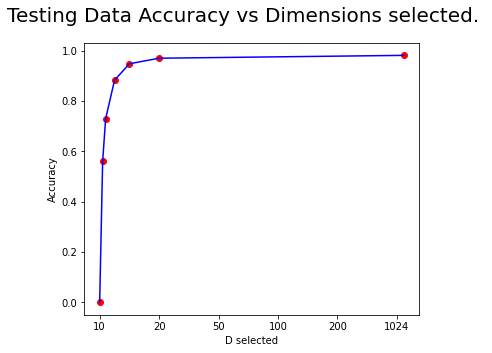

In [ ]:
# Plot the test accuracy for each value of D

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot()
ax.plot(dimensions_svd, result, color='blue')
ax.scatter(x = dimensions_svd, y = result, color='red')   
fig.suptitle('Testing Data Accuracy vs Dimensions selected. ', fontsize=20)
plt.xlabel('D selected', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
ax.set_xticklabels(dimensions_svd)
# plt.xlim(left=1)
# plt.margins(0)
# plt.xticks(np.arange(len(dimensions_svd)), np.arange(1, len(dimensions_svd)+1))
plt.show()

## Problem 2: Network Compression Using SVD

From now on, fix your D = 20 and let's improve its performance.

In [ ]:

initializer = tf.keras.initializers.HeNormal()

new_nw = Sequential([
  Dense(units = 20, activation=None, kernel_initializer = initializer, use_bias=False, input_shape=(28 * 28,)), 
  Dense(units=1024, activation='relu', kernel_initializer = initializer,use_bias= True),
  Dense(units = 20, activation=None,  kernel_initializer = initializer, use_bias=False),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,use_bias= True),
  Dense(units = 20, activation=None,  kernel_initializer = initializer, use_bias=False),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,use_bias= True),
  Dense(units = 20, activation=None,  kernel_initializer = initializer, use_bias=False),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,use_bias= True),
  Dense(units = 20, activation=None,  kernel_initializer = initializer, use_bias=False),
  Dense(units=1024, activation='relu', kernel_initializer = initializer,use_bias= True),
  Dense(units=10, activation='softmax')                                
])

new_nw.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15680     
                                                                 
 dense_1 (Dense)             (None, 1024)              21504     
                                                                 
 dense_2 (Dense)             (None, 20)                20480     
                                                                 
 dense_3 (Dense)             (None, 1024)              21504     
                                                                 
 dense_4 (Dense)             (None, 20)                20480     
                                                                 
 dense_5 (Dense)             (None, 1024)              21504     
                                                                 
 dense_6 (Dense)             (None, 20)               

Weights from all the layers of the baseline model except for the last layer

In [ ]:
new_nw_layer_weights = []

for layer in baseline_FC.layers[:-1]:
  new_nw_layer_weights.append(layer.get_weights()[0])

**SVD Implementation**

In [ ]:
def np_svd1(weight, d = 20):
  s, u, v = tf.linalg.svd(weight)
  U = u[:, : d]
  V = tf.matmul( tf.linalg.diag(s)[:d,:d] , tf.transpose(v[:,:d]))
  return U,V

In [ ]:
# Get U and V matrices for D=20
new_weights = []
for i, layer in enumerate(baseline_FC.layers[:-1]):

  nu,nv = np_svd1(new_nw_layer_weights[i], 20)
  new_weights.append(nu)
  new_weights.append(nv)

In [ ]:
test1 = np.asarray(new_weights, dtype='object')
test1.shape

(10,)

In [ ]:
weights = test1 # U and V matrices, truncated by D=20

# import the weights from the SVD model into the new model:

for i, layer in enumerate(new_nw.layers[:0]):
  svd_weight = weights[i]
  original_bias = new_nw.layers[i+1].get_weights()
  new_nw.layers[i+1].set_weights([svd_weight, original_bias])

In [ ]:
# Compile the model

# Learning rate
learning_rate = .001 

optimizer_new_nw = tf.keras.optimizers.Adam(learning_rate = learning_rate)

new_nw.compile(optimizer=optimizer_new_nw, loss=SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
%%time

batch_size = 1024
n_epochs = 75

#Train and evaluate Test data accuracy
new_nw_history = new_nw.fit(x=x_train, y=y_train ,
                  batch_size=batch_size,
                  epochs=n_epochs,
                  validation_data=(x_test, y_test),
                  verbose=2)

score2 = new_nw.evaluate(x_test, y_test, verbose=0)


print('Test data accuracy:', score2[1])

Epoch 1/75


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 - 1s - loss: 1.4564 - accuracy: 0.8477 - val_loss: 0.2480 - val_accuracy: 0.9358 - 1s/epoch - 19ms/step
Epoch 2/75
59/59 - 0s - loss: 0.1814 - accuracy: 0.9460 - val_loss: 0.2066 - val_accuracy: 0.9451 - 297ms/epoch - 5ms/step
Epoch 3/75
59/59 - 0s - loss: 0.1422 - accuracy: 0.9564 - val_loss: 0.1759 - val_accuracy: 0.9512 - 282ms/epoch - 5ms/step
Epoch 4/75
59/59 - 0s - loss: 0.1178 - accuracy: 0.9633 - val_loss: 0.1688 - val_accuracy: 0.9546 - 294ms/epoch - 5ms/step
Epoch 5/75
59/59 - 0s - loss: 0.0986 - accuracy: 0.9698 - val_loss: 0.1662 - val_accuracy: 0.9544 - 278ms/epoch - 5ms/step
Epoch 6/75
59/59 - 0s - loss: 0.0854 - accuracy: 0.9732 - val_loss: 0.1629 - val_accuracy: 0.9556 - 286ms/epoch - 5ms/step
Epoch 7/75
59/59 - 0s - loss: 0.0786 - accuracy: 0.9748 - val_loss: 0.1615 - val_accuracy: 0.9588 - 284ms/epoch - 5ms/step
Epoch 8/75
59/59 - 0s - loss: 0.0677 - accuracy: 0.9779 - val_loss: 0.1534 - val_accuracy: 0.9608 - 287ms/epoch - 5ms/step
Epoch 9/75
59/59 - 0s - loss:

In [ ]:
print('\033[1m'+ f'Test data accuracy : {score2[1]*100}'  + '\033[0m')

Test data accuracy : 97.14999794960022


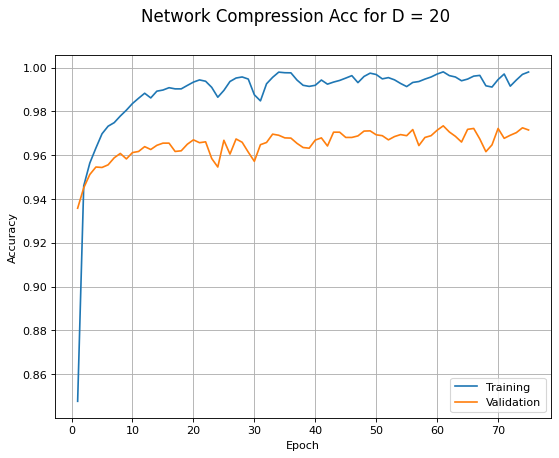

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range(1,len(new_nw_history.history['accuracy'])+1),
         new_nw_history.history['accuracy'])
plt.plot(range(1,len(new_nw_history.history['val_accuracy'])+1),
         new_nw_history.history['val_accuracy'])
plt.suptitle('Network Compression Acc for D = 20', fontsize = 15)
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Problem 3: Network Compression Using SVD
SVD at every epoch.

In [ ]:
@tf.custom_gradient
def svd_op(weight):
    s, u, v = tf.linalg.svd(weight)
    U = u[:, :20]
    V = tf.matmul( tf.linalg.diag(s)[:20,:20] , tf.transpose(v[:,:20]))
    W_hat = tf.matmul(U, V)

    def custom_grad(dy):
        grad = 1.0
        return dy*grad

    return W_hat, custom_grad


Create a Custom Dense Layer for SVD

In [ ]:
class CustomDenseLayerWithSVD(keras.layers.Layer):
  def __init__(self, units=1024, input_dim =784):
    super(CustomDenseLayerWithSVD, self).__init__()
    self.w = self.add_weight(shape=(input_dim, units), 
                             initializer="he_normal", trainable=True)
    self.b = self.add_weight(shape=(units,), initializer="zeros", trainable=True)

  def call(self, inputs):
    return tf.nn.relu(tf.matmul(inputs, svd_op(self.w)) + self.b)

In [ ]:
# Create Model
input = tf.keras.layers.Input(shape = (None,784))
x = CustomDenseLayerWithSVD()(input)
output = tf.keras.layers.Dense(10 , activation='softmax')(x)
model_n = tf.keras.Model(inputs = [input], outputs = [output])

model_n.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])
model_n.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 784)]       0         
                                                                 
 custom_dense_layer_with_svd  (None, None, 1024)       803840    
  (CustomDenseLayerWithSVD)                                      
                                                                 
 dense_11 (Dense)            (None, None, 10)          10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

(TensorShape([60000, 784]),
 TensorShape([60000]),
 TensorShape([10000, 784]),
 TensorShape([10000]))

In [ ]:
%%time

#Train and evaluate the test data accuracy

batch_size = 1024
n_epochs = 50

model_n_history = model_n.fit(x=x_train, y=y_train ,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 - 19s - loss: 2.0851 - accuracy: 0.4548 - val_loss: 1.6522 - val_accuracy: 0.5639 - 19s/epoch - 323ms/step
Epoch 2/50
59/59 - 18s - loss: 1.1216 - accuracy: 0.7323 - val_loss: 0.7111 - val_accuracy: 0.8213 - 18s/epoch - 311ms/step
Epoch 3/50
59/59 - 18s - loss: 0.5925 - accuracy: 0.8454 - val_loss: 0.4747 - val_accuracy: 0.8765 - 18s/epoch - 310ms/step
Epoch 4/50
59/59 - 18s - loss: 0.4470 - accuracy: 0.8783 - val_loss: 0.4005 - val_accuracy: 0.8901 - 18s/epoch - 307ms/step
Epoch 5/50
59/59 - 18s - loss: 0.3875 - accuracy: 0.8919 - val_loss: 0.3526 - val_accuracy: 0.9021 - 18s/epoch - 305ms/step
Epoch 6/50
59/59 - 18s - loss: 0.3534 - accuracy: 0.9010 - val_loss: 0.3278 - val_accuracy: 0.9082 - 18s/epoch - 307ms/step
Epoch 7/50
59/59 - 18s - loss: 0.3298 - accuracy: 0.9076 - val_loss: 0.3076 - val_accuracy: 0.9127 - 18s/epoch - 306ms/step
Epoch 8/50
59/59 - 18s - loss: 0.3119 - accuracy: 0.9123 - val_loss: 0.2948 - val_accuracy: 0.9150 - 18s/epoch - 309ms/step
Epoch 9/50
59/59 - 

In [ ]:
%%time
score3 = model_n.evaluate(x_test, y_test, verbose=0)

CPU times: user 1min 17s, sys: 4.51 s, total: 1min 22s
Wall time: 1min 20s


In [ ]:
print('\033[1m' +f'Test data accuracy : {np.round(score3[1]*100, 3)}'+ '\033[0m')


Test data accuracy : 96.39


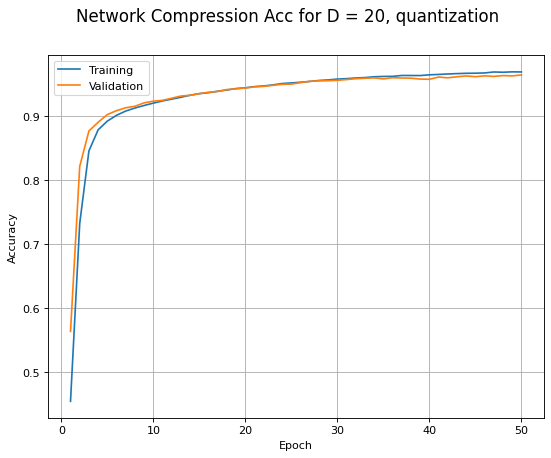

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range(1,len(model_n_history.history['accuracy'])+1),
         model_n_history.history['accuracy'])
plt.plot(range(1,len(model_n_history.history['val_accuracy'])+1),
         model_n_history.history['val_accuracy'])
plt.suptitle('Network Compression Acc for D = 20, quantization', fontsize = 15)
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Convert the notebook to HTML

In [6]:
%%shell
jupyter nbconvert --to html /content/AG_DLS_HW_4.ipynb
jupyter nbconvert --to html /content/AG_DLS_HW_4_pb_4_LSTM.ipynb


[NbConvertApp] Converting notebook /content/AG_DLS_HW_4.ipynb to html
[NbConvertApp] Writing 510029 bytes to /content/AG_DLS_HW_4.html
[NbConvertApp] Converting notebook /content/AG_DLS_HW_4_pb_4_LSTM.ipynb to html
[NbConvertApp] Writing 686310 bytes to /content/AG_DLS_HW_4_pb_4_LSTM.html


# **THE END**